//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


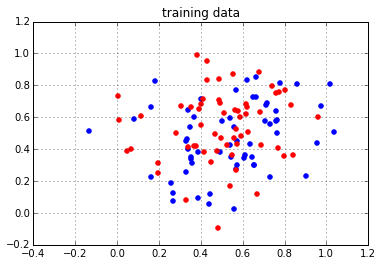

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors as NN
%matplotlib inline

# create training data 
p11= 0.5 *(np.random.normal(0.0,np.sqrt(0.1),(60,1)) + np.random.normal(1.0,np.sqrt(0.1),(60,1)))
p12= 0.5 *(np.random.normal(1.0,np.sqrt(0.1),(60,1)) + np.random.normal(0.0,np.sqrt(0.1),(60,1)))
p21= 0.5 *(np.random.normal(0.0,np.sqrt(0.1),(60,1)) + np.random.normal(1.0,np.sqrt(0.1),(60,1)))
p22= 0.5 *(np.random.normal(0.0,np.sqrt(0.1),(60,1)) + np.random.normal(1.0,np.sqrt(0.1),(60,1)))
x_a = np.vstack((np.hstack((p11,p12)),np.hstack((p21,p22))))
t_a = np.hstack((np.array(-1.0*np.ones(60)),np.array(np.ones(60)))).T

plt.scatter(x_a[:60,0],x_a[:60,1],color='b')
plt.scatter(x_a[60:,0],x_a[60:,1],color='r')
plt.title('training data')
plt.grid()
plt.show()



## 6.1

In [ ]:
# knn implementation

def KNN(x_alpha,t_alpha,P,k):
    diff = x_alpha - P
    distances = np.sqrt(np.square(diff[:,0])+np.square(diff[:,1]))
    knn = np.argsort(distances)[0:k]
    if np.mean(t_alpha[knn])<0:
        return -1
    else:
        return 1
    
nsamples = 20000
testp = np.vstack((np.random.rand(nsamples),np.random.rand(nsamples))).T
results1 = []
results3 = []
results5 = []

plt.figure(figsize=(7,7))
for i in range(nsamples-1):
    results1.append(KNN(x_a,t_a,testp[i,:],1))
    if results1[i] == -1:
        plt.scatter(testp[i,0],testp[i,1],color='0.3',label='negtest')
    else:
        plt.scatter(testp[i,0],testp[i,1],color='0.8',label='postest')
    
plt.scatter(x_a[:60,0],x_a[:60,1],color='b')
plt.scatter(x_a[60:,0],x_a[60:,1],color='r')
plt.title('k = 1')
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.grid()
plt.show()


plt.figure(figsize=(7,7))
for i in range(nsamples-1):
    results3.append(KNN(x_a,t_a,testp[i,:],3))
    if results3[i] == -1:
        plt.scatter(testp[i,0],testp[i,1],color='0.3',label='negtest')
    else:
        plt.scatter(testp[i,0],testp[i,1],color='0.8',label='postest')
    
plt.scatter(x_a[:60,0],x_a[:60,1],color='b')
plt.scatter(x_a[60:,0],x_a[60:,1],color='r')
plt.title('k = 3')
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.grid()
plt.show()

plt.figure(figsize=(7,7))
for i in range(nsamples-1):
    results5.append(KNN(x_a,t_a,testp[i,:],5))
    if results5[i] == -1:
        plt.scatter(testp[i,0],testp[i,1],color='0.3',label='negtest')
    else:
        plt.scatter(testp[i,0],testp[i,1],color='0.8',label='postest')
    
plt.scatter(x_a[:60,0],x_a[:60,1],color='b')
plt.scatter(x_a[60:,0],x_a[60:,1],color='r')
plt.title('k = 5')
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.grid()
plt.show()

          

## 6.2



//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


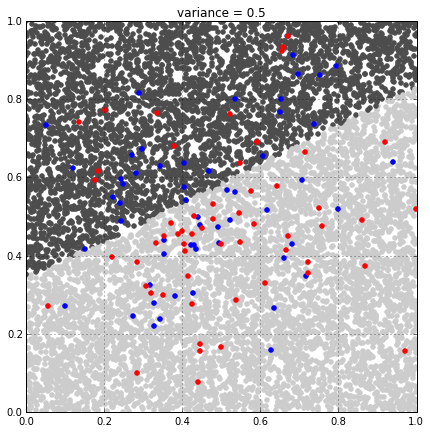

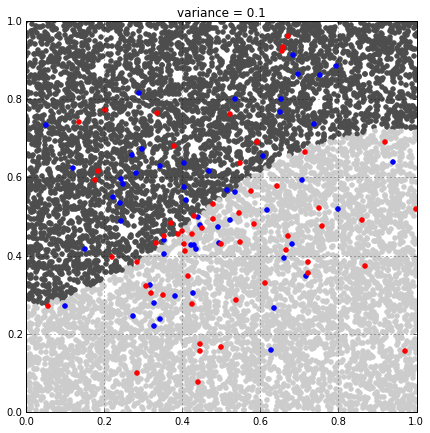

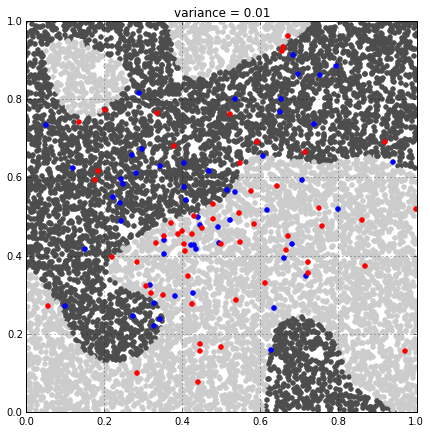

In [14]:
# implementation of "Parzen Window" classifier

from scipy.stats import norm

def gaussian(x,sig):
    return np.exp(-np.power(x , 2.) / (2 * np.power(sig, 2.)))

def Parzen_Window(x_alpha,t_alpha,P,var):
    diff = x_alpha - P
    distances = np.sqrt(np.square(diff[:,0])+np.square(diff[:,1]))
    weights = gaussian(distances,np.sqrt(var))
    if np.mean(np.dot(weights,t_alpha.T))<0:
        return -1
    else:
        return 1

nsamples = 10000
testp = np.vstack((np.random.rand(nsamples),np.random.rand(nsamples))).T
results05 = []
results01 = []
results001 = []

plt.figure(figsize=(7,7))
for i in range(nsamples-1):
    results05.append(Parzen_Window(x_a,t_a,testp[i,:],0.5))
    if results05[i] == -1:
        plt.scatter(testp[i,0],testp[i,1],color='0.3',label='negtest')
    else:
        plt.scatter(testp[i,0],testp[i,1],color='0.8',label='postest')
    
plt.scatter(x_a[:60,0],x_a[:60,1],color='b')
plt.scatter(x_a[60:,0],x_a[60:,1],color='r')
plt.title('variance = 0.5')
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.grid()
plt.show()

plt.figure(figsize=(7,7))
for i in range(nsamples-1):
    results01.append(Parzen_Window(x_a,t_a,testp[i,:],0.1))
    if results01[i] == -1:
        plt.scatter(testp[i,0],testp[i,1],color='0.3',label='negtest')
    else:
        plt.scatter(testp[i,0],testp[i,1],color='0.8',label='postest')
    
plt.scatter(x_a[:60,0],x_a[:60,1],color='b')
plt.scatter(x_a[60:,0],x_a[60:,1],color='r')
plt.title('variance = 0.1')
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.grid()
plt.show()

plt.figure(figsize=(7,7))
for i in range(nsamples-1):
    results001.append(Parzen_Window(x_a,t_a,testp[i,:],0.01))
    if results001[i] == -1:
        plt.scatter(testp[i,0],testp[i,1],color='0.3',label='negtest')
    else:
        plt.scatter(testp[i,0],testp[i,1],color='0.8',label='postest')
    
plt.scatter(x_a[:60,0],x_a[:60,1],color='b')
plt.scatter(x_a[60:,0],x_a[60:,1],color='r')
plt.title('variance = 0.01')
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.grid()
plt.show()



### d)

How should the classifications be modified if a third class with $\mu_3\,=\,(0.5,0.5)^T$ and $\sigma = 0.05$ would be added?

- it wouldn't be possible any longer to classify by the mean value of the summed up classes of the nearest neighbours (6.1) / of the summed up weighed class values (6.2)

- KNN: the class of an entry data point P should be the most counted class within the k nearest neighbours of P; a decision must be found for the case, that more than one class has the highest counted value e.g. one could increase k by one till the decision is unique or choose by random

- "Parzen-Window" classifier: for each class, all weights should be summed and the class with the highest amount would be the best class

- for a better selectivity, k should be increased (6.1) / $\sigma$ should be decreased (6.2) if one of the following cases comes true:

         - more classes are applied
         - distances between the $\mu$'s of the classes shrink
         - variances of the classes become greater

## 6.3

In [ ]:
# implementation of RBF Network


